# 1. Import librairies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# 2. Import des données

In [2]:
# données de l'entreprise
dispo_alimentaire_2017 = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
population = pd.read_csv("Population_2000_2018.csv")
# données site fao
pib =pd.read_csv("Pib_pays.csv")
stabilite = pd.read_csv("Stabilite_politique.csv")

# 3. Néttoyage des dataframes 

## 3.1 Néttoyage dataframe dispo_alimentaire_2017

In [3]:
dispo_alimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
# sélectionner variables utiles
dispo_alimentaire_2017= dispo_alimentaire_2017[["Zone","Élément","Année","Valeur","Produit"]]
dispo_alimentaire_2017.head()

,Zone,Élément,Année,Valeur,Produit
0,Afghanistan,Production,2017,4281.0,Blé et produits
1,Afghanistan,Importations - Quantité,2017,2302.0,Blé et produits
2,Afghanistan,Variation de stock,2017,-119.0,Blé et produits
3,Afghanistan,Exportations - Quantité,2017,0.0,Blé et produits
4,Afghanistan,Disponibilité intérieure,2017,6701.0,Blé et produits


In [5]:
# pivoter le dataframe
dispo_alimentaire_2017 = dispo_alimentaire_2017.pivot_table(index=['Zone','Produit'], columns='Élément', values='Valeur', aggfunc=sum).reset_index()
dispo_alimentaire_2017.head()

Élément,Zone,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,NaN,NaN,NaN,5.0,1.47,0.19,0.64,53.0,NaN,6.0,53.0,NaN,48.0,0.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",NaN,NaN,NaN,1.0,1.32,0.01,0.02,50.0,0.0,33.0,48.0,2.0,17.0,0.0,NaN,NaN,NaN
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0
3,Afghanistan,Aliments pour enfants,NaN,NaN,NaN,1.0,0.10,0.01,0.04,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Ananas et produits,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
# supprimer les variables unitiles
dispo_alimentaire_2017.drop(columns=[
    "Alimentation pour touristes", 
    "Aliments pour animaux",
    "Autres utilisations (non alimentaire)", 
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de matière grasse en quantité (g/personne/jour)",
    "Nourriture", 
    "Pertes",
    "Résidus",
    "Semences",
    "Traitement",
    "Variation de stock"],axis=1, inplace=True)
dispo_alimentaire_2017.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Abats Comestible,5.0,0.64,53.0,NaN,6.0,48.0
1,Afghanistan,"Agrumes, Autres",1.0,0.02,50.0,0.0,33.0,17.0
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,0.0,NaN,0.0,NaN
3,Afghanistan,Aliments pour enfants,1.0,0.04,4.0,NaN,4.0,NaN
4,Afghanistan,Ananas et produits,0.0,0.00,0.0,0.0,0.0,NaN


In [7]:
dispo_alimentaire_2017['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'H

In [8]:
# aggrégation des variables par zone et produit
dispo_alimentaire_2017.groupby(["Zone","Produit"]).sum().loc[:, 
['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production']].reset_index() 
dispo_alimentaire_2017.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Abats Comestible,5.0,0.64,53.0,NaN,6.0,48.0
1,Afghanistan,"Agrumes, Autres",1.0,0.02,50.0,0.0,33.0,17.0
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,0.0,NaN,0.0,NaN
3,Afghanistan,Aliments pour enfants,1.0,0.04,4.0,NaN,4.0,NaN
4,Afghanistan,Ananas et produits,0.0,0.00,0.0,0.0,0.0,NaN


In [9]:
dispo_alimentaire_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16047 entries, 0 to 16046
Data columns (total 8 columns):
Zone                                                        16047 non-null object
Produit                                                     16047 non-null object
Disponibilité alimentaire (Kcal/personne/jour)              14476 non-null float64
Disponibilité de protéines en quantité (g/personne/jour)    14507 non-null float64
Disponibilité intérieure                                    15905 non-null float64
Exportations - Quantité                                     12113 non-null float64
Importations - Quantité                                     15260 non-null float64
Production                                                  10334 non-null float64
dtypes: float64(6), object(2)
memory usage: 1003.0+ KB


In [10]:
# aggrégation disponibilité alimentaire (Kcal/personne/jour) par zone
dispo_total_kcal = dispo_alimentaire_2017[["Zone","Disponibilité alimentaire (Kcal/personne/jour)"]].groupby('Zone').sum().reset_index()
dispo_total_kcal.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,1997.0
1,Afrique du Sud,2987.0
2,Albanie,3400.0
3,Algérie,3345.0
4,Allemagne,3559.0


In [11]:
dispo_total_kcal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
Zone                                              174 non-null object
Disponibilité alimentaire (Kcal/personne/jour)    174 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [12]:
dispo_total_kcal.duplicated().sum()

0

In [13]:
# aggrégation disponibilité de protéines en quantité (g/personne/jour) par zone 
dispo_total_proteine = dispo_alimentaire_2017[["Zone","Disponibilité de protéines en quantité (g/personne/jour)"]].groupby('Zone').sum().reset_index()
dispo_total_proteine.head()

Élément,Zone,Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,54.09
1,Afrique du Sud,83.36
2,Albanie,119.50
3,Algérie,92.85
4,Allemagne,104.07


In [14]:
# selectionner les produits origines animales
liste_animal =["Viande de Bovins", 
    "Viande d'Ovins/Caprins", 
    "Viande de Suides", 
    "Viande de Volailles", 
    "Viande, Autre", 
    "Abats Comestible", 
    "Oeufs",
    "Poissons Eau Douce",
    "perciform",
    "Poissons Pelagique",
    "Poissons Marins, Autres",
    "Crustacés",
    "Cephalopodes",
    "Mollusques, Autres",
    "Animaux Aquatiques Autre",
    "Viande de Anim Aquatiq"]

#Création d'une table ne contenant que les informations des produits origines animales
origine_animal = dispo_alimentaire_2017.loc[dispo_alimentaire_2017['Produit'].isin(liste_animal),:]
origine_animal.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Abats Comestible,5.0,0.64,53.0,NaN,6.0,48.0
50,Afghanistan,Oeufs,6.0,0.44,74.0,0.0,54.0,20.0
59,Afghanistan,Poissons Eau Douce,0.0,0.07,9.0,NaN,0.0,9.0
75,Afghanistan,Viande d'Ovins/Caprins,26.0,1.62,160.0,NaN,0.0,160.0
76,Afghanistan,Viande de Bovins,15.0,1.09,100.0,NaN,6.0,94.0


In [15]:
# aggrégation disponibilité de protéines en quantité (g/personne/jour) d'origine animale par zone 
dispo_proteine_animal = origine_animal[["Zone","Disponibilité de protéines en quantité (g/personne/jour)"]].groupby('Zone').sum().reset_index()
dispo_proteine_animal.head()

Élément,Zone,Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,4.54
1,Afrique du Sud,28.21
2,Albanie,26.02
3,Algérie,9.73
4,Allemagne,34.69


In [16]:
# Calcul de la part de proteine animale dans le proteine total
proteine= pd.merge(dispo_total_proteine, dispo_proteine_animal, on='Zone')
proteine.head()

Élément,Zone,Disponibilité de protéines en quantité (g/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_y
0,Afghanistan,54.09,4.54
1,Afrique du Sud,83.36,28.21
2,Albanie,119.50,26.02
3,Algérie,92.85,9.73
4,Allemagne,104.07,34.69


In [17]:
# le ration proteine_animal/proteine_total 
proteine['ratio proteine_animal/proteine_total'] = round((proteine['Disponibilité de protéines en quantité (g/personne/jour)_y']/proteine['Disponibilité de protéines en quantité (g/personne/jour)_x'])*100,2)
proteine.head()

Élément,Zone,Disponibilité de protéines en quantité (g/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_y,ratio proteine_animal/proteine_total
0,Afghanistan,54.09,4.54,8.39
1,Afrique du Sud,83.36,28.21,33.84
2,Albanie,119.50,26.02,21.77
3,Algérie,92.85,9.73,10.48
4,Allemagne,104.07,34.69,33.33


In [18]:
# renommer des colonnes et supprimer des colonnes
proteine = proteine.rename(columns={"Disponibilité de protéines en quantité (g/personne/jour)_x":"Disponibilité de protéines en quantité (g/personne/jour)"})
proteine= proteine.drop(columns=["Disponibilité de protéines en quantité (g/personne/jour)_y"])
proteine.head()

Élément,Zone,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total
0,Afghanistan,54.09,8.39
1,Afrique du Sud,83.36,33.84
2,Albanie,119.50,21.77
3,Algérie,92.85,10.48
4,Allemagne,104.07,33.33


In [19]:
proteine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 3 columns):
Zone                                                        174 non-null object
Disponibilité de protéines en quantité (g/personne/jour)    174 non-null float64
ratio proteine_animal/proteine_total                        172 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.4+ KB


In [20]:
proteine.loc[proteine['ratio proteine_animal/proteine_total'].isnull(),:]

Élément,Zone,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total
18,Bermudes,0.0,NaN
22,Brunéi Darussalam,0.0,NaN


In [21]:
dispo_alimentaire_2017.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Abats Comestible,5.0,0.64,53.0,NaN,6.0,48.0
1,Afghanistan,"Agrumes, Autres",1.0,0.02,50.0,0.0,33.0,17.0
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,0.0,NaN,0.0,NaN
3,Afghanistan,Aliments pour enfants,1.0,0.04,4.0,NaN,4.0,NaN
4,Afghanistan,Ananas et produits,0.0,0.00,0.0,0.0,0.0,NaN


In [22]:
# sélectionner la production, importation ,exportation et disponibilité interieure de volaille
dispo_alimentaire_volaille = dispo_alimentaire_2017.loc[dispo_alimentaire_2017['Produit']== 'Viande de Volailles']
dispo_alimentaire_volaille.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
78,Afghanistan,Viande de Volailles,5.0,0.54,57.0,NaN,29.0,28.0
173,Afrique du Sud,Viande de Volailles,143.0,14.11,2118.0,63.0,514.0,1667.0
265,Albanie,Viande de Volailles,85.0,6.26,47.0,0.0,38.0,13.0
357,Algérie,Viande de Volailles,22.0,1.97,277.0,0.0,2.0,275.0
452,Allemagne,Viande de Volailles,71.0,7.96,1739.0,646.0,842.0,1514.0


In [23]:
# renommer et supprimer des colonnes
dispo_alimentaire_volaille = dispo_alimentaire_volaille.rename(columns={"Importations - Quantité":"Importations","Exportations - Quantité":"Exportations"})
dispo_alimentaire_volaille = dispo_alimentaire_volaille.drop(columns=["Produit","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"])
dispo_alimentaire_volaille.head()

Élément,Zone,Disponibilité intérieure,Exportations,Importations,Production
78,Afghanistan,57.0,NaN,29.0,28.0
173,Afrique du Sud,2118.0,63.0,514.0,1667.0
265,Albanie,47.0,0.0,38.0,13.0
357,Algérie,277.0,0.0,2.0,275.0
452,Allemagne,1739.0,646.0,842.0,1514.0


In [24]:
# calcul le taux en importation et le taux d'autosuffisance en volaille par zone

dispo_alimentaire_volaille['Taux importations'] = round((dispo_alimentaire_volaille['Importations']/ dispo_alimentaire_volaille['Disponibilité intérieure'])*100,2)
dispo_alimentaire_volaille['Taux autosuffisance'] = round((dispo_alimentaire_volaille['Exportations']/ dispo_alimentaire_volaille['Disponibilité intérieure'])*100,2)
dispo_alimentaire_volaille.head()

Élément,Zone,Disponibilité intérieure,Exportations,Importations,Production,Taux importations,Taux autosuffisance
78,Afghanistan,57.0,NaN,29.0,28.0,50.88,NaN
173,Afrique du Sud,2118.0,63.0,514.0,1667.0,24.27,2.97
265,Albanie,47.0,0.0,38.0,13.0,80.85,0.00
357,Algérie,277.0,0.0,2.0,275.0,0.72,0.00
452,Allemagne,1739.0,646.0,842.0,1514.0,48.42,37.15


In [25]:
dispo_alimentaire_volaille.isna().sum()

Élément
Zone                         0
Disponibilité intérieure     2
Exportations                37
Importations                 2
Production                   4
Taux importations            2
Taux autosuffisance         37
dtype: int64

In [26]:
# supprimmer des colonnes 
dispo_alimentaire_volaille = dispo_alimentaire_volaille.drop(columns=['Disponibilité intérieure','Exportations','Importations','Production'])

In [27]:
dispo_alimentaire_volaille.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 78 to 16043
Data columns (total 3 columns):
Zone                   172 non-null object
Taux importations      170 non-null float64
Taux autosuffisance    135 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.4+ KB


In [28]:
dispo_alimentaire_volaille.isna().sum()

Élément
Zone                    0
Taux importations       2
Taux autosuffisance    37
dtype: int64

In [29]:
dispo_alimentaire_volaille.loc[dispo_alimentaire_volaille['Taux autosuffisance'].isnull(),:]

Élément,Zone,Taux importations,Taux autosuffisance
78,Afghanistan,50.88,NaN
1298,Bahamas,92.31,NaN
1393,Bangladesh,0.00,NaN
2261,Burkina Faso,0.00,NaN
2538,Cabo Verde,120.00,NaN
2634,Cambodge,26.32,NaN
3867,Cuba,91.23,NaN
4147,Djibouti,100.00,NaN
5174,Gambie,200.00,NaN
5359,Grenade,87.50,NaN


les pays ayant une faible économique

In [30]:
# remplacer les NaN par 0 pour ne pas supprimer tous ces pays
dispo_alimentaire_volaille.fillna(value=0, inplace=True) 

In [31]:
dispo_alimentaire_volaille.isna().sum()

Élément
Zone                   0
Taux importations      0
Taux autosuffisance    0
dtype: int64

In [32]:
# recherche de doublon
dispo_alimentaire_volaille.duplicated().sum()

0

## Resumé nettoyage dataframe dispo_alimentaire_2017 :
- a) on a conversé:
la variable disponibilité alimentaire (Kcal/personne/jour) en calculant sa totalité par zone  --> variable : dispo_total_kcal
- b) on a crée de nouvelles variables :
- en calculant la part de protéine animale par rapport à la disponibilité de protéines en quantité (g/personne/jour) total par zone  -->  variable :ratio proteine_animal/proteine_total
- en calculant  le taux en importation de volaille par zone --> variable : Taux importations
- en le taux d'autosuffisance en volaille par zone --> variable : Taux autosiffisance


## 3.2 Néttoyage dataframe population

In [33]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [34]:
population = population[["Zone","Année","Valeur"]]
population["Valeur"] = population["Valeur"]*1000
population= population.rename(columns={"Valeur":"Habitants"})
population.head()

,Zone,Année,Habitants
0,Afghanistan,2000,20779953.0
1,Afghanistan,2001,21606988.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680871.0
4,Afghanistan,2004,24726684.0


In [35]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
Zone         4411 non-null object
Année        4411 non-null int64
Habitants    4411 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.5+ KB


In [36]:
population.isna().sum()

Zone         0
Année        0
Habitants    0
dtype: int64

In [37]:
population.duplicated().sum()

0

In [38]:
population_2017 = population.loc[population['Année']== 2017]
population_2012 = population.loc[population['Année']== 2012]

In [39]:
population_2017.shape

(236, 3)

In [40]:
population_2012.shape

(236, 3)

In [41]:
population_pays = pd.merge(population_2012, population_2017, on='Zone', how='left')
population_pays.head()

,Zone,Année_x,Habitants_x,Année_y,Habitants_y
0,Afghanistan,2012,31161376.0,2017,36296113.0
1,Afrique du Sud,2012,52832658.0,2017,57009756.0
2,Albanie,2012,2914096.0,2017,2884169.0
3,Algérie,2012,37383895.0,2017,41389189.0
4,Allemagne,2012,80972628.0,2017,82658409.0


In [42]:
population_pays['% evolution population 5 ans'] = round(((population_pays['Habitants_y'] - population_pays['Habitants_x']))
                                           / population_pays['Habitants_x'] *100, 2)
population_pays.head()

,Zone,Année_x,Habitants_x,Année_y,Habitants_y,% evolution population 5 ans
0,Afghanistan,2012,31161376.0,2017,36296113.0,16.48
1,Afrique du Sud,2012,52832658.0,2017,57009756.0,7.91
2,Albanie,2012,2914096.0,2017,2884169.0,-1.03
3,Algérie,2012,37383895.0,2017,41389189.0,10.71
4,Allemagne,2012,80972628.0,2017,82658409.0,2.08


In [43]:
population_pays = population_pays.drop(columns=["Année_y","Habitants_x","Habitants_y","Année_x"])
population_pays.head()

,Zone,% evolution population 5 ans
0,Afghanistan,16.48
1,Afrique du Sud,7.91
2,Albanie,-1.03
3,Algérie,10.71
4,Allemagne,2.08


In [44]:
population_pays.shape

(236, 2)

In [45]:
population_pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 2 columns):
Zone                            236 non-null object
% evolution population 5 ans    236 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


## Resumé nettoyage dataframe population :
-  on a crée une  nouvelle variable :
en calculant le pourcentage de l'évolution de la population de chaque pays de 2012 à 2017  --> variable : % evolution population 5 ans


## 3.3 Néttoyage dataframe pib

In [46]:
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,48460.512961,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752219,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936054,X,Ciffre de sources internationales,NaN


In [47]:
pib.shape

(211, 15)

In [48]:
pib = pib[["Zone","Valeur","Année"]]
pib.head()

,Zone,Valeur,Année
0,Pays-Bas (Royaume des),48460.512961,2017
1,Afghanistan,530.149831,2017
2,Afrique du Sud,6723.928582,2017
3,Albanie,4521.752219,2017
4,Algérie,4134.936054,2017


In [49]:
pib['Zone'].unique()

array(['Pays-Bas (Royaume des)', 'Afghanistan', 'Afrique du Sud',
       'Albanie', 'Algérie', 'Allemagne', 'Andorre', 'Angola', 'Anguilla',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie',
       'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus', 'Belgique',
       'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale', 'Chypre',
       'Colombie', 'Comores', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatie', 'Cuba', 'Curaçao', 'Danemark', 'Djibouti', 'Dominique',
       'Égypte', 'El Salvador', 'Émirats arabes unis', 'Équateur',
       'Érythrée', 'Espagne', 'Estonie', 'Eswatini',
       "États-Un

In [51]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
Zone      211 non-null object
Valeur    211 non-null float64
Année     211 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


In [52]:
pib.duplicated().sum()

0

In [53]:
pib.shape

(211, 3)

In [54]:
# renommer et supprimer des colonnes
pib = pib.drop(columns=["Année"])
pib= pib.rename(columns={"Valeur":"PIB/Habitant $"})
pib.head()

,Zone,PIB/Habitant $
0,Pays-Bas (Royaume des),48460.512961
1,Afghanistan,530.149831
2,Afrique du Sud,6723.928582
3,Albanie,4521.752219
4,Algérie,4134.936054


In [55]:
pib.isna().sum()

Zone              0
PIB/Habitant $    0
dtype: int64

### Resumé Néttoyage dataframe pib
- On a converse la valeur de pib/habitant en dollar --> variable : PIB/Habitant $

## 3.4 Néttoyage dataframe stabilité

In [56]:
stabilite.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,1.76,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,1.30,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,indice,1.16,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2004,2004,indice,1.02,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2005,2005,indice,0.99,X,Ciffre de sources internationales,NaN


In [57]:
stabilite.shape

(4074, 15)

In [58]:
# selectionner seulement les variables utiles
stabilite = stabilite[["Zone","Valeur","Année"]]
stabilite.head()

,Zone,Valeur,Année
0,Pays-Bas (Royaume des),1.76,2000
1,Pays-Bas (Royaume des),1.30,2002
2,Pays-Bas (Royaume des),1.16,2003
3,Pays-Bas (Royaume des),1.02,2004
4,Pays-Bas (Royaume des),0.99,2005


In [59]:
stabilite['Année'].unique()

array([2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [60]:
stabilite.dtypes

Zone       object
Valeur    float64
Année       int64
dtype: object

In [61]:
# conserver seulement stabilite politqiue  en 2017

stabilite_2017 = stabilite.loc[stabilite['Année']== 2017]
stabilite_2017.head()

,Zone,Valeur,Année
16,Pays-Bas (Royaume des),0.92,2017
37,Afghanistan,-2.80,2017
58,Afrique du Sud,-0.28,2017
79,Albanie,0.38,2017
100,Algérie,-0.92,2017


In [62]:
stabilite_2017.shape

(196, 3)

In [64]:
stabilite_2017= stabilite_2017.drop(columns=["Année"])
stabilite_2017= stabilite_2017.rename(columns={"Valeur":"Indixe stabilité"})
stabilite_2017.head()

,Zone,Indixe stabilité
16,Pays-Bas (Royaume des),0.92
37,Afghanistan,-2.80
58,Afrique du Sud,-0.28
79,Albanie,0.38
100,Algérie,-0.92


In [65]:
stabilite_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 16 to 4069
Data columns (total 2 columns):
Zone                196 non-null object
Indixe stabilité    196 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [66]:
stabilite_2017.duplicated().sum()

0

### Resumé Néttoyage dataframe pib
- On a converse la valeur d' indice de stabilité politique de chaque pays --> variable : Indixe stabilité

In [67]:
dispo_total_kcal.shape

(174, 2)

In [68]:
proteine.shape

(174, 3)

In [69]:

dispo_alimentaire_volaille.shape

(172, 3)

In [70]:
population_pays.shape

(236, 2)

In [71]:
pib.shape

(211, 2)

In [72]:
stabilite_2017.shape

(196, 2)

### 4.  Jointure des dataframes

In [73]:
# jointure des dataframes
jointure_1 = pd.merge(dispo_alimentaire_volaille,proteine, on = 'Zone' ,how = 'left' )

jointure_2 = pd.merge(jointure_1,dispo_total_kcal, on = 'Zone' ,how = 'left')

jointure_3 = pd.merge(jointure_2,population_pays,  on = 'Zone' ,how = 'left')

jointure_4 = pd.merge(jointure_3,pib,  on = 'Zone' ,how = 'left')

df = pd.merge(jointure_4,stabilite_2017,  on = 'Zone' ,how = 'left')

df.head()

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
0,Afghanistan,50.88,0.00,54.09,8.39,1997.0,16.48,530.149831,-2.80
1,Afrique du Sud,24.27,2.97,83.36,33.84,2987.0,7.91,6723.928582,-0.28
2,Albanie,80.85,0.00,119.50,21.77,3400.0,-1.03,4521.752219,0.38
3,Algérie,0.72,0.00,92.85,10.48,3345.0,10.71,4134.936054,-0.92
4,Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59


In [74]:
df.shape

(172, 9)

### 4.1 Néttoyage dataframe aprés jointure

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 9 columns):
Zone                                                        172 non-null object
Taux importations                                           172 non-null float64
Taux autosuffisance                                         172 non-null float64
Disponibilité de protéines en quantité (g/personne/jour)    172 non-null float64
ratio proteine_animal/proteine_total                        172 non-null float64
Disponibilité alimentaire (Kcal/personne/jour)              172 non-null float64
% evolution population 5 ans                                172 non-null float64
PIB/Habitant $                                              170 non-null float64
Indixe stabilité                                            167 non-null float64
dtypes: float64(8), object(1)
memory usage: 13.4+ KB


In [76]:
df.isna().sum()

Zone                                                        0
Taux importations                                           0
Taux autosuffisance                                         0
Disponibilité de protéines en quantité (g/personne/jour)    0
ratio proteine_animal/proteine_total                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
% evolution population 5 ans                                0
PIB/Habitant $                                              2
Indixe stabilité                                            5
dtype: int64

In [77]:
# recherche valeurs manquantes dataframe complet aprés les jointures
# recherche valeurs manquantes dans variable pib/habitant
df.loc[df['PIB/Habitant $'].isnull(),:]

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
33,"Chine, Taiwan Province de",20.51,1.02,85.71,42.59,2976.0,1.40,NaN,NaN
117,Pays-Bas,163.44,381.18,104.43,32.60,3251.0,1.37,NaN,NaN


"Chine, Taiwan Province de" , n'étant pas unaniement reconnue par la communauté internationnale et n'ayant pas de PIB dans la base de données de la banque mondiale donc on peut le supprimer.

In [78]:
# inserer valeur pib pays-bas manquante aprés la jointure
df.loc[df['Zone'] == 'Pays-Bas', 'PIB/Habitant $'] = 48460.5

In [79]:
# verifier de nouveau les valeurs manquantes 
df.loc[df['PIB/Habitant $'].isnull(),:]

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
33,"Chine, Taiwan Province de",20.51,1.02,85.71,42.59,2976.0,1.4,NaN,NaN


In [80]:
# recherche valeurs manquantes dans variable Indixe stabilité
df.loc[df['Indixe stabilité'].isnull(),:]

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
33,"Chine, Taiwan Province de",20.51,1.02,85.71,42.59,2976.0,1.40,NaN,NaN
34,"Chine, continentale",2.49,3.17,101.44,35.59,3197.0,2.66,8729.136932,NaN
108,Nouvelle-Calédonie,81.82,0.00,83.12,38.07,2750.0,6.33,32263.340715,NaN
117,Pays-Bas,163.44,381.18,104.43,32.60,3251.0,1.37,48460.500000,NaN
120,Polynésie française,100.00,0.00,97.51,47.11,2917.0,2.64,19743.958991,NaN


Nouvelle-Calédonie et Polynésie française sont des pays sont sous dépendance de la France et n'ayant pas d'indixe de statabilité politique dans la base de donnée donc on peut les supprimer.

Chine, continentale	n'ayant pas d'indixe de statabilité politique dans la base de donnée donc on peut lui inserer une valeur nulle comme indixe de statabilité politique


In [81]:
# inserer valeur indexe stabalité politique pays-bas manquante aprés la jointure
df.loc[df['Zone'] == 'Pays-Bas', 'Indixe stabilité'] = 0.92

In [82]:
# inserer la valeur nulle à Chine, continentale
df.loc[df['Zone'] == 'Chine, continentale', 'Indixe stabilité'] = 0

In [83]:
# verifier de nouveau les valeurs manquantes
df.loc[df['Indixe stabilité'].isnull(),:]

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
33,"Chine, Taiwan Province de",20.51,1.02,85.71,42.59,2976.0,1.40,NaN,NaN
108,Nouvelle-Calédonie,81.82,0.00,83.12,38.07,2750.0,6.33,32263.340715,NaN
120,Polynésie française,100.00,0.00,97.51,47.11,2917.0,2.64,19743.958991,NaN


In [84]:
df.isna().sum()

Zone                                                        0
Taux importations                                           0
Taux autosuffisance                                         0
Disponibilité de protéines en quantité (g/personne/jour)    0
ratio proteine_animal/proteine_total                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
% evolution population 5 ans                                0
PIB/Habitant $                                              1
Indixe stabilité                                            3
dtype: int64

In [85]:
#supprimer les nan
df= df.dropna()

In [86]:
df.isna().sum()

Zone                                                        0
Taux importations                                           0
Taux autosuffisance                                         0
Disponibilité de protéines en quantité (g/personne/jour)    0
ratio proteine_animal/proteine_total                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
% evolution population 5 ans                                0
PIB/Habitant $                                              0
Indixe stabilité                                            0
dtype: int64

In [87]:
df.shape

(169, 9)

In [88]:
df['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras',
       'Hongrie', 'Inde', 'Indonésie', "Iran (Répu

On supprime les provinces de chine en conservant seulement la chine continentale

In [89]:
# chercher la position de Chine - RAS de Macao dans le dataframe pour la supprimer
df.loc[df['Zone']== 'Chine - RAS de Macao']

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
32,Chine - RAS de Macao,121.05,0.0,100.37,60.98,2999.0,10.38,78985.632288,1.43


In [90]:
# chercher la position de Chine -RAS de Hong-Kong  dans le dataframe pour la supprimer
df.loc[df['Zone']== 'Chine - RAS de Hong-Kong']

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
31,Chine - RAS de Hong-Kong,323.93,236.79,137.88,64.9,3353.0,3.68,45737.483212,0.83


In [91]:
# supprimmer Chine - RAS de Hong-Kong et Chine - RAS de Macao
df = df.drop(labels=32,axis=0)
df = df.drop(labels=31,axis=0)

In [92]:
df.shape

(167, 9)

### 4.2 Recherche des outliers des variables

In [93]:
df.head()

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
0,Afghanistan,50.88,0.00,54.09,8.39,1997.0,16.48,530.149831,-2.80
1,Afrique du Sud,24.27,2.97,83.36,33.84,2987.0,7.91,6723.928582,-0.28
2,Albanie,80.85,0.00,119.50,21.77,3400.0,-1.03,4521.752219,0.38
3,Algérie,0.72,0.00,92.85,10.48,3345.0,10.71,4134.936054,-0.92
4,Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59


In [94]:
df.describe()

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,42.750479,13.450120,80.602335,26.157246,2854.185629,7.085808,13240.285125,-0.083653
std,47.153745,47.319579,19.915268,10.664479,459.399957,6.619942,18584.859011,0.893193
min,0.000000,0.000000,39.910000,4.490000,1754.000000,-7.030000,414.740323,-2.940000
25%,3.965000,0.000000,63.995000,17.110000,2508.500000,2.270000,1939.899238,-0.635000
50%,24.130000,0.000000,80.530000,27.450000,2864.000000,6.150000,5825.224294,-0.040000
75%,77.730000,9.090000,95.215000,34.170000,3250.500000,11.575000,15844.253589,0.625000
max,222.370000,431.580000,141.340000,51.070000,3770.000000,33.390000,110203.008202,1.600000


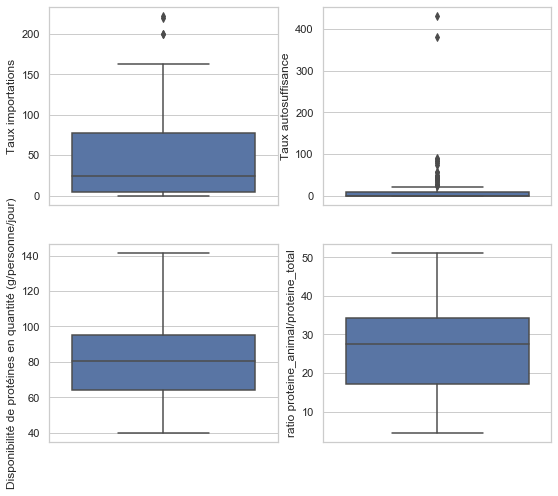

In [95]:
# Afficher des boxplot des variables
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df,y='Taux importations')
plt.subplot(222)
sns.boxplot(data=df, y='Taux autosuffisance')
plt.subplot(223)
sns.boxplot(data=df, y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.subplot(224)
sns.boxplot(data=df,y='ratio proteine_animal/proteine_total')



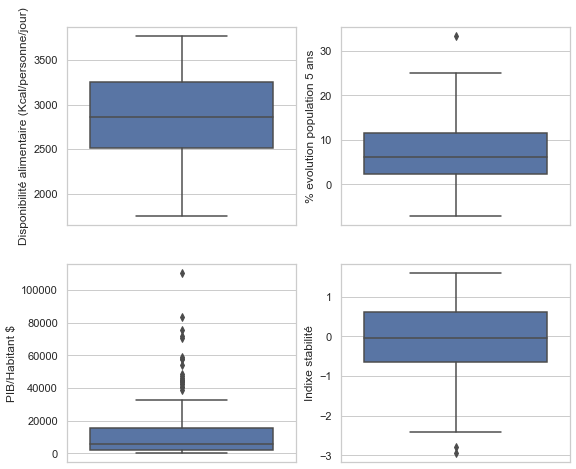

In [96]:
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df,y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.subplot(222)
sns.boxplot(data=df,y='% evolution population 5 ans')
plt.subplot(223)
sns.boxplot(data=df,y='PIB/Habitant $')
plt.subplot(224)
sns.boxplot(data=df,y='Indixe stabilité')

In [97]:
# Afficher les valeurs extremes de PIB/Habitant
df.sort_values(by = ['PIB/Habitant $'], ascending = False).head()

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
87,Luxembourg,100.00,9.09,105.79,38.17,3334.0,11.50,110203.008202,1.33
144,Suisse,38.35,3.01,95.46,31.32,3414.0,5.59,83353.597572,1.26
107,Norvège,1.96,0.00,109.98,30.43,3384.0,5.64,75490.688450,1.17
71,Islande,20.00,0.00,141.34,31.52,3629.0,2.68,71961.532046,1.35
70,Irlande,77.34,72.66,105.81,31.89,3714.0,3.15,70491.993301,1.00


In [98]:
box_plt = "{:.2f}".format(df['PIB/Habitant $'].quantile(q = 0.75) + 1.5 * (df['PIB/Habitant $'].quantile(q = 0.75) - df['PIB/Habitant $'].quantile(q = 0.25)))
print(box_plt)

36700.79


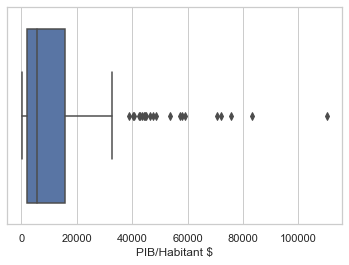

In [99]:
sns.boxplot(x=df['PIB/Habitant $'] )

In [100]:
outliers=df[df['PIB/Habitant $'] > 37573.02]
outliers.sort_values(by = ['PIB/Habitant $'], ascending = False).head()

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
87,Luxembourg,100.00,9.09,105.79,38.17,3334.0,11.50,110203.008202,1.33
144,Suisse,38.35,3.01,95.46,31.32,3414.0,5.59,83353.597572,1.26
107,Norvège,1.96,0.00,109.98,30.43,3384.0,5.64,75490.688450,1.17
71,Islande,20.00,0.00,141.34,31.52,3629.0,2.68,71961.532046,1.35
70,Irlande,77.34,72.66,105.81,31.89,3714.0,3.15,70491.993301,1.00


On conserve les outliers

In [101]:
df.shape

(167, 9)

In [102]:
# exporter le dataframe complet aprés jointures des dataframes et néttoyage 
df.to_csv (r'C:\Users\HP\Desktop\python\data.csv', index = None, header=True) 

### 4.2 Corrélation entre les variables

In [103]:
# Afficher la matrice de corrélation
corr_df = df.corr()
h=pd.DataFrame(corr_df)
h.head()

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
Taux importations,1.000000,0.332547,-0.058661,0.061560,-0.078072,0.068791,0.083432,0.294252
Taux autosuffisance,0.332547,1.000000,0.249946,0.144827,0.307680,-0.229159,0.294171,0.182637
Disponibilité de protéines en quantité (g/personne/jour),-0.058661,0.249946,1.000000,0.479352,0.886918,-0.477210,0.634934,0.438340
ratio proteine_animal/proteine_total,0.061560,0.144827,0.479352,1.000000,0.380613,-0.454425,0.476783,0.552838
Disponibilité alimentaire (Kcal/personne/jour),-0.078072,0.307680,0.886918,0.380613,1.000000,-0.467740,0.580748,0.404998


on a une corrélation entre les variables : 
Disponibilité alimentaire (Kcal/personne/jour) et Disponibilité de protéines en quantité (g/personne/jour).
PIB/Habitant $ et Disponibilité de protéines en quantité (g/personne/jour)	
